# Example Dashboard

## Dashboard 1

Plot the cross spectral density (CSD) of two signals using csd.

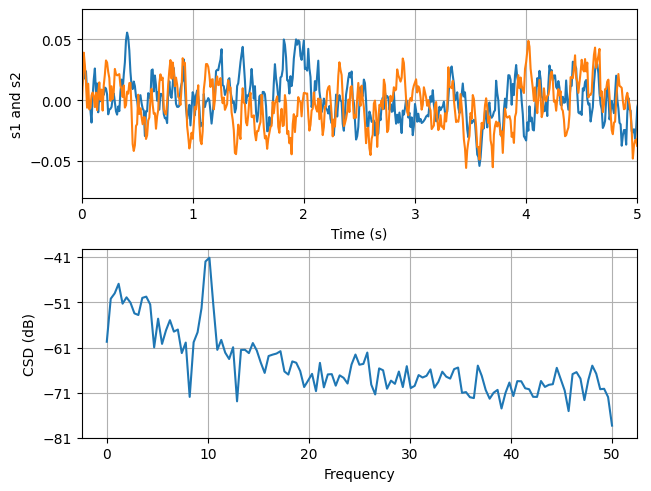

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained')

dt = 0.01
t = np.arange(0, 30, dt)

# Fixing random state for reproducibility
np.random.seed(19680801)


nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t / 0.05)

cnse1 = np.convolve(nse1, r, mode='same') * dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same') * dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse2

ax1.plot(t, s1, t, s2)
ax1.set_xlim(0, 5)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('s1 and s2')
ax1.grid(True)

cxy, f = ax2.csd(s1, s2, NFFT=256, Fs=1. / dt)
ax2.set_ylabel('CSD (dB)')

plt.show()

## Dashboard 2 

One possibility is to simply remove undesired data points. The line plotted through the remaining data will be continuous, and not indicate where the missing data is located.

If it is useful to have gaps in the line where the data is missing, then the undesired points can be indicated using a masked array or by setting their values to NaN. No marker will be drawn where either x or y are masked and, if plotting with a line, it will be broken there.

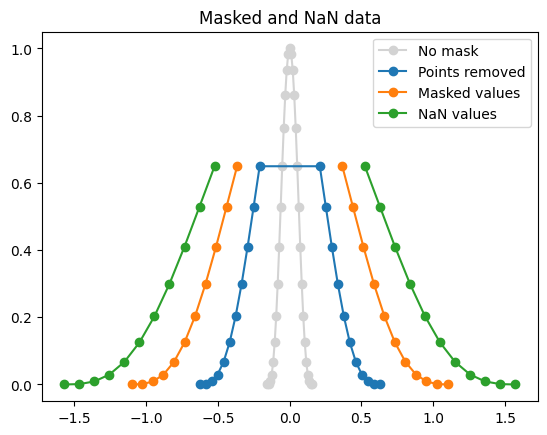

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-np.pi/2, np.pi/2, 31)
y = np.cos(x)**3

# 1) remove points where y > 0.7
x2 = x[y <= 0.7]
y2 = y[y <= 0.7]

# 2) mask points where y > 0.7
y3 = np.ma.masked_where(y > 0.7, y)

# 3) set to NaN where y > 0.7
y4 = y.copy()
y4[y3 > 0.7] = np.nan

plt.plot(x*0.1, y, 'o-', color='lightgrey', label='No mask')
plt.plot(x2*0.4, y2, 'o-', label='Points removed')
plt.plot(x*0.7, y3, 'o-', label='Masked values')
plt.plot(x*1.0, y4, 'o-', label='NaN values')
plt.legend()
plt.title('Masked and NaN data')
plt.show()

## Dashboard3

This layout features a central scatter plot illustrating the relationship between x and y, a histogram at the top displaying the distribution of x, and a histogram on the right showing the distribution of y.

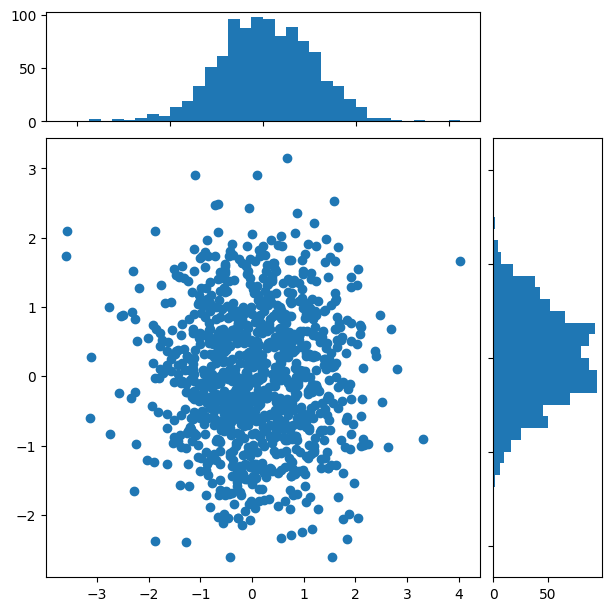

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

# some random data
x = np.random.randn(1000)
y = np.random.randn(1000)


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

fig, axs = plt.subplot_mosaic([['histx', '.'],
                               ['scatter', 'histy']],
                              figsize=(6, 6),
                              width_ratios=(4, 1), height_ratios=(1, 4),
                              layout='constrained')
scatter_hist(x, y, axs['scatter'], axs['histx'], axs['histy'])